Structuring Strategy:
1. reducing the df size by removing all unnecessary columns, including repeated and 0 variance columns
2. add external data that can inprove analyses and is a useful chunk of information
3. improve the outlay of the df for better data understanding
4. check if some columns read into incorrect data types, figure out why and fix the problem as required
5. remove extreme outliers which are causing great data skewness by using univariate analyses like 

```python
# Import all required modules/packages
```

In [63]:
import pandas as pd
import numpy as np
import matplotlib as plt
import missingno as mano
import seaborn as sns


%matplotlib inline
pd.set_option('display.max_rows', 50)


In [64]:
raw=pd.read_csv("dirty_songs.csv", low_memory=False)
raw.shape
display(raw)
raw.columns

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.0134,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,NaN,5,-4.783,1,0.0623,0.013800,4.14E-06,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,NaN,0,-4.710,1,0.1030,0.023700,0,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,NaN,2,-7.668,1,0.2930,NaN,0,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,1.82E-05,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyr,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.0296,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

```python
# Drop Duplicate and Highly Similar Columns.
```

In [65]:
display(raw['type'].value_counts())
#column type is the same for all columns

display(raw[['id', 'uri', 'track_href', 'analysis_url']])
#all for of the above columns have the same data, with the only difference being a prefix which is the same for all rows in a column
#therefore making 3/4 columns repitive data

display(raw['Unnamed: 0'])
#column Unnamed: 0' is a counter column for all rows that have a missing song name
#the column will be useless for us since we plan to fill in song names through spotify's API

audio_features    42305
Name: type, dtype: int64

,id,uri,track_href,analysis_url
0,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...
1,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...
2,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...
3,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...
4,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...
...,...,...,...,...
42300,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...
42301,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...
42302,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...
42303,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
42300    20995.0
42301    20996.0
42302    20997.0
42303    20998.0
42304    20999.0
Name: Unnamed: 0, Length: 42305, dtype: float64

In [66]:
raw.drop(raw.columns[[11, 13, 14, 15, 20]], axis=1, inplace=True)
raw.shape
display(raw)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre,song_name,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.0134,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap,Pathology,NaN
2,0.850,NaN,5,-4.783,1,0.0623,0.013800,4.14E-06,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap,Symbiote,NaN
3,0.476,NaN,0,-4.710,1,0.1030,0.023700,0,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN
4,0.798,NaN,2,-7.668,1,0.2930,NaN,0,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap,Venom,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,46bXU7Sgj7104ZoXxzz9tM,269208,4,hardstyle,NaN,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,1.82E-05,0.2050,0.3830,149.928,0he2ViGMUO3ajKTxLOfWVT,210112,4,hardstyr,NaN,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,72DAt9Lbpy9EUS29OzQLob,234823,4,hardstyle,NaN,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.0296,0.0575,0.4880,150.042,6HXgExFVuE1c3cq9QjFCcU,323200,4,hardstyle,NaN,Euphoric Hardstyle


```python
# Data Enriching. Joining artist names from csv file created using Spotify API.
```

In [67]:
artists=pd.read_csv('artists.csv')

artist=artists['artist_name']

raw=raw.join(artist)

display(raw)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre,song_name,title,artist_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.0134,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde,NaN,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap,Pathology,NaN,Ghostemane
2,0.850,NaN,5,-4.783,1,0.0623,0.013800,4.14E-06,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap,Symbiote,NaN,Pathology
3,0.476,NaN,0,-4.710,1,0.1030,0.023700,0,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,Don Kenobi
4,0.798,NaN,2,-7.668,1,0.2930,NaN,0,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap,Venom,NaN,Symbiote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,46bXU7Sgj7104ZoXxzz9tM,269208,4,hardstyle,NaN,Euphoric Hardstyle,NaN
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,1.82E-05,0.2050,0.3830,149.928,0he2ViGMUO3ajKTxLOfWVT,210112,4,hardstyr,NaN,Greatest Hardstyle Playlist,NaN
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,72DAt9Lbpy9EUS29OzQLob,234823,4,hardstyle,NaN,Best of Hardstyle 2020,NaN
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.0296,0.0575,0.4880,150.042,6HXgExFVuE1c3cq9QjFCcU,323200,4,hardstyle,NaN,Euphoric Hardstyle,NaN


```python
# Rename and Re-Ordering Columns for more accurate data understanding
```


In [68]:
raw.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'duration_ms', 'time_signature', 'genre', 'song_name', 'title',
       'artist_name'],
      dtype='object')

In [69]:
#renaming
raw=raw.rename(columns= {"title" : "playlist_name"})
raw.shape

(42305, 18)

In [70]:
#re-ordering
raw=raw[['id','song_name', 'artist_name', 'playlist_name', 'genre', 'duration_ms', 'time_signature', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
display(raw)

,id,song_name,artist_name,playlist_name,genre,duration_ms,time_signature,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2Vc6NJ9PW9gD9q343XFRKx,Mercury: Retrograde,Mercury: Retrograde,NaN,Dark Trap,124539,4,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.0134,0.0556,0.3890,156.985
1,7pgJBLVz5VmnL7uGHmRj6p,Pathology,Ghostemane,NaN,Dark Trap,224427,4,0.719,0.493,8,-7.230,1,0.0794,0.401000,0,0.1180,0.1240,115.080
2,0vSWgAlfpye0WCGeNmuNhy,Symbiote,Pathology,NaN,Dark Trap,98821,4,0.850,NaN,5,-4.783,1,0.0623,0.013800,4.14E-06,0.3720,0.0391,218.050
3,0VSXnJqQkwuH2ei1nOQ1nu,ProductOfDrugs (Prod. The Virus and Antidote),Don Kenobi,NaN,Dark Trap,123661,3,0.476,NaN,0,-4.710,1,0.1030,0.023700,0,0.1140,0.1750,186.948
4,4jCeguq9rMTlbMmPHuO7S3,Venom,Symbiote,NaN,Dark Trap,123298,4,0.798,NaN,2,-7.668,1,0.2930,NaN,0,0.1660,0.5910,147.988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,46bXU7Sgj7104ZoXxzz9tM,NaN,NaN,Euphoric Hardstyle,hardstyle,269208,4,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013
42301,0he2ViGMUO3ajKTxLOfWVT,NaN,NaN,Greatest Hardstyle Playlist,hardstyr,210112,4,0.517,0.768,0,-7.922,0,0.0479,0.022500,1.82E-05,0.2050,0.3830,149.928
42302,72DAt9Lbpy9EUS29OzQLob,NaN,NaN,Best of Hardstyle 2020,hardstyle,234823,4,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935
42303,6HXgExFVuE1c3cq9QjFCcU,NaN,NaN,Euphoric Hardstyle,hardstyle,323200,4,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.0296,0.0575,0.4880,150.042


```python
# Fixing incorrectly assigned dtypes at file reading
```

In [71]:
print(raw.dtypes)
#python warning: Columns energy, mode, intrumentalness, song_name have mixed data types
#3/4, that is, energy, mode and intrumentalness are supposed to be numeric(float) columns

id                   object
song_name            object
artist_name          object
playlist_name        object
genre                object
duration_ms           int64
time_signature        int64
danceability        float64
energy               object
key                   int64
loudness            float64
mode                 object
speechiness         float64
acousticness        float64
instrumentalness     object
liveness            float64
valence             float64
tempo               float64
dtype: object


In [72]:
#since most of mode values can be seen to be binary it is easy to single out the strings using unique category counts
raw['mode'].value_counts()

1      23244
0      19059
fds        1
fa         1
Name: mode, dtype: int64

In [73]:
#convert all non-numeric values in these columns to NaN
raw['energy'] = pd.to_numeric(raw['energy'], downcast='float', errors='coerce')
raw['mode'] = pd.to_numeric(raw['mode'], errors='coerce')
raw['instrumentalness'] = pd.to_numeric(raw['instrumentalness'], errors='coerce')

raw.dtypes


id                   object
song_name            object
artist_name          object
playlist_name        object
genre                object
duration_ms           int64
time_signature        int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

```python
# Outliers (extreme) Detection and Removal
```

In [74]:
raw.columns

Index(['id', 'song_name', 'artist_name', 'playlist_name', 'genre',
       'duration_ms', 'time_signature', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')

In [75]:
raw_numeric=raw[['duration_ms',
       'time_signature', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]
display(raw_numeric.describe())

,duration_ms,time_signature,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,42305.000000,42305.000000,4.229400e+04,4.228600e+04,4.230500e+04,4.230100e+04,42303.000000,42293.000000,42292.000000,42304.000000,42305.000000,42305.000000,4.229300e+04
mean,250865.846685,3.972580,3.272279e+02,9.104068e+04,7.092607e+03,-1.174771e+03,0.549465,0.136536,0.096147,0.283036,0.214079,0.357101,1.000884e+06
std,102957.713571,0.268342,6.716459e+04,1.872105e+07,1.478744e+06,2.402878e+05,0.497553,0.126145,0.170829,0.370788,0.175576,0.233200,2.041512e+08
min,25600.000000,1.000000,6.510000e-02,2.430000e-04,-4.294824e+06,-4.942049e+07,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,5.796700e+01
25%,179840.000000,4.000000,5.240000e-01,6.320000e-01,1.000000e+00,-8.161000e+00,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,1.299310e+02
50%,224760.000000,4.000000,6.450000e-01,8.030000e-01,6.000000e+00,-6.234000e+00,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,1.449730e+02
75%,301133.000000,4.000000,7.660000e-01,9.230000e-01,9.000000e+00,-4.513000e+00,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,1.614640e+02
max,913052.000000,5.000000,1.381274e+07,3.849714e+09,3.041204e+08,3.148000e+00,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,4.198284e+10


<AxesSubplot:>

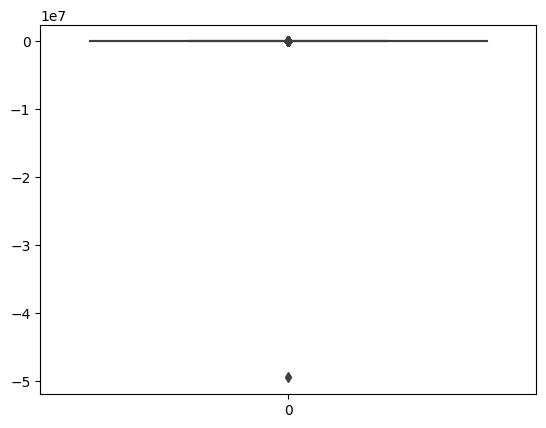

In [76]:
sns.boxplot(raw['loudness'])


In [77]:
#all columns which are supposed to have values within 0 and 1 are, danceability,energy, speechiness,acousticness,instrumentalness,liveness,valence
#combine outlier indeces in an array to remove later
outliers=np.where(raw['energy']>1)
outliers=np.append(outliers, np.where((raw['danceability']>1) | (raw['danceability']<0)))
outliers=np.append(outliers, np.where((raw['acousticness']>1) | (raw['acousticness']<0)))
outliers=np.append(outliers, np.where((raw['instrumentalness']>1) | (raw['instrumentalness']<0)))
outliers=np.append(outliers, np.where((raw['liveness']>1) | (raw['liveness']<0)))
outliers=np.append(outliers, np.where((raw['valence']>1) | (raw['valence']<0)))
outliers=np.append(outliers, np.where((raw['key']>100) | (raw['key']<0))) #its a count of things, cant be 0
outliers=np.append(outliers, np.where((raw['loudness']>4) | (raw['loudness']<-200))) #bcs the maximum looks like  a normal outlier
outliers=np.append(outliers, np.where((raw['tempo']>2000) | (raw['tempo']<0)))

raw=raw.drop(outliers, inplace=False)
#rows with outliers dropped

display(raw.describe())

,duration_ms,time_signature,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,42298.000000,42298.000000,42287.000000,42279.000000,42298.000000,42294.000000,42296.000000,42286.000000,42287.000000,42297.000000,42298.000000,42298.000000,42287.000000
mean,250872.810086,3.972576,0.639334,0.762503,5.370396,-6.464922,0.549437,0.136522,0.096154,0.283047,0.214083,0.357122,147.471978
std,102957.584431,0.268364,0.156615,0.183815,3.666152,2.941181,0.497556,0.126132,0.170837,0.370798,0.175579,0.233208,23.841717
min,25600.000000,1.000000,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000
25%,179843.250000,4.000000,0.524000,0.632000,1.000000,-8.160000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000
50%,224766.000000,4.000000,0.645000,0.803000,6.000000,-6.233500,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000
75%,301133.000000,4.000000,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000
max,913052.000000,5.000000,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000


<AxesSubplot:>

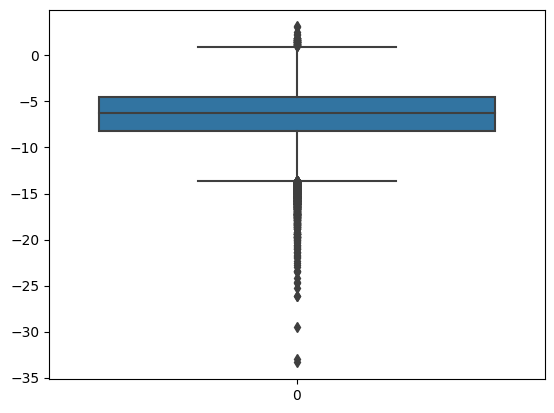

In [78]:
sns.boxplot(raw['loudness'])
#we have dropped the extreme outlier, and now we can see that most of the data is concentrated at one peak. 
#this median will be used to calcuate the misisng values and since very low missing vlaues, it would not be a problem

<AxesSubplot:>

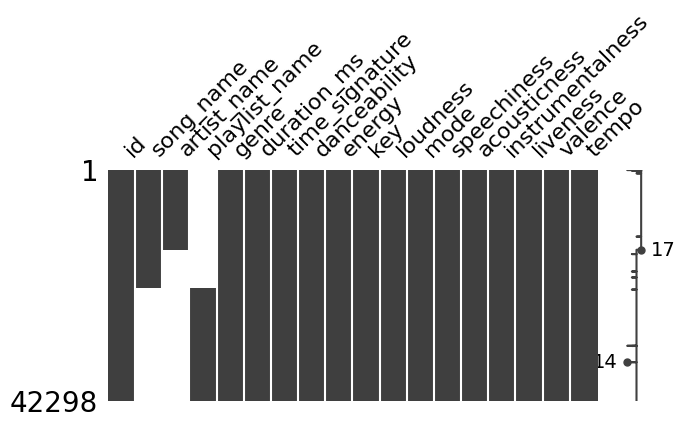

In [79]:
# visualize the location of the missingness of data using mano.matrix
mano.matrix(raw, figsize=(7,3))
#we can see that song_name and title have a very same missing pattern, where there is no song name, there is title

<AxesSubplot:>

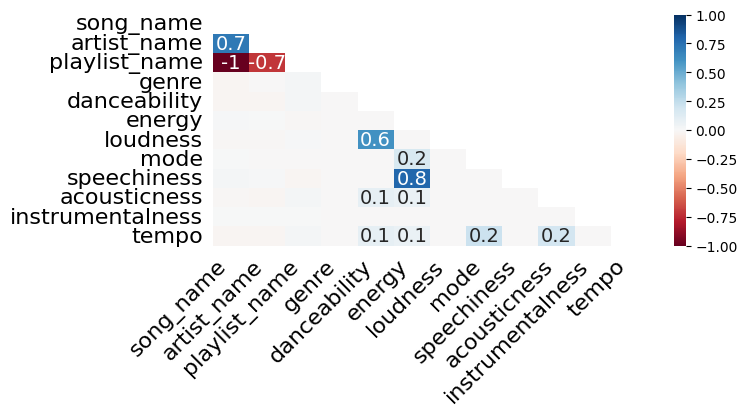

In [80]:
mano.heatmap(raw, figsize=(7,3))
#not showing the others because some float columns have been read in as object columns eg energy, mode
#some columns also very clearly have the exact same data under different column names

<AxesSubplot:>

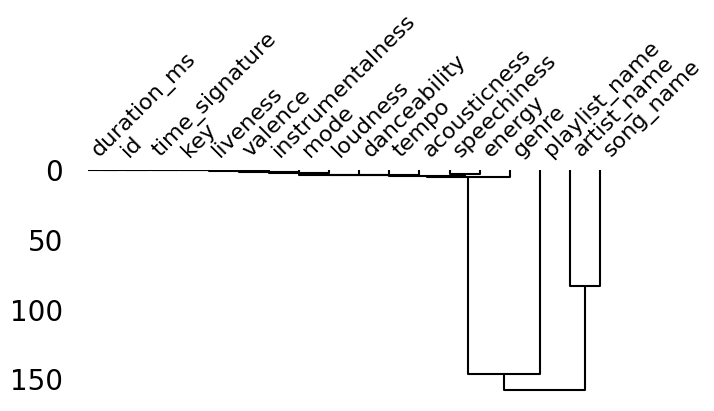

In [81]:
mano.dendrogram(raw,  figsize=(7,3))

<AxesSubplot:>

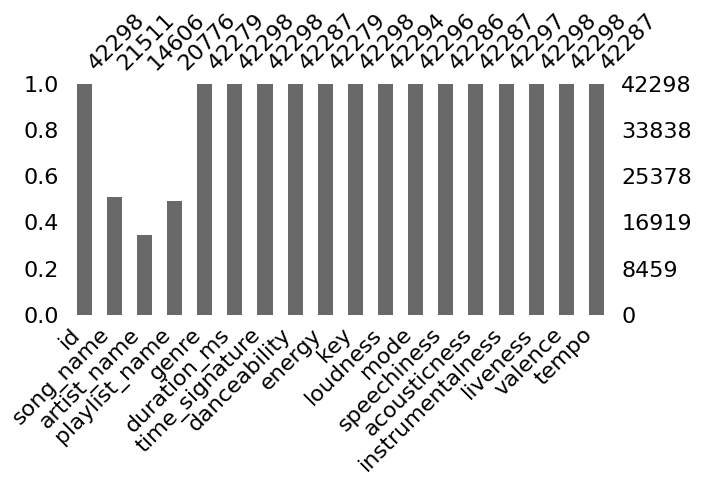

In [82]:
mano.bar(raw,  figsize=(7,3))
#most are seen in last two, rest have very less frequency of missing vlaues.

In [83]:
raw.isnull().sum()

id                      0
song_name           20787
artist_name         27692
playlist_name       21522
genre                  19
duration_ms             0
time_signature          0
danceability           11
energy                 19
key                     0
loudness                4
mode                    2
speechiness            12
acousticness           11
instrumentalness        1
liveness                0
valence                 0
tempo                  11
dtype: int64

```python
# Publishing File
```

In [84]:
raw.to_csv('structured_songs.csv', index= False)